## Modèles à base d'équations différentielles

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

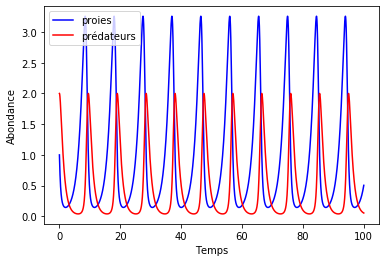

In [35]:
# The classical prey predator model

def model(C,t):
    prey=C[0]
    predator=C[1]
    dprey = prey*((2/3)-(4/3)*predator)
    dpredator = predator*(1*prey-1)
    return [dprey,dpredator]

t = np.linspace(0,100,100000)
ds = odeint(model,[1,2],t)

X=ds[:,0]
Y=ds[:,1]

%matplotlib inline
plt.figure(1)
plt.plot(t,X,'b-',t,Y,'r')
plt.xlabel('Temps')
plt.ylabel('Abondance')
plt.legend(['proies','prédateurs'])
plt.show()

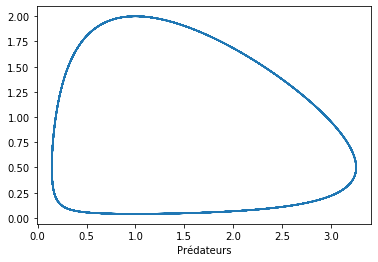

[0.0, 0.0]


In [37]:
# Question 1 : tracer le plan de phase courbe (X(t),Y(t)) et déterminer l'équilibre du système

plt.plot(X,Y)
plt.xlabel('Proies')
plt.xlabel('Prédateurs')
plt.show()

# à vue de nez, le point d'équilibre est (1,0.5)
# Cependant, cela se vérifie en calculant model([1,0.5],t) qui est nul 
# (i.e., la vitesse d'évolution est nulle) quelle que soit la valeur de t choisie 

print(model([1,0.5],1))


In [ ]:
# Question 2 : tracer les courbes des espèces du modèle BIOMD0000000006 - Tyson1991 - Cell Cycle 2 var

def model(C,t):
    u=C[0]
    v=C[1]
    kappa = 0.015
    k6 = 1.0
    k4 = 180.0
    k4prime = 0.018
    alpha = k4prime/k4
    du = k4*(v-u)*(alpha+u**2)-k6*u
    dv = kappa-k6*u
    return [du,dv]

t = np.linspace(0,100,100000)
ds = odeint(model,[0,0],t)

X=ds[:,0]
Y=ds[:,1]

%matplotlib inline
plt.figure(1)
plt.plot(t,X,'b-',t,Y,'r')
plt.xlabel('Temps')
plt.ylabel('Abondance')
plt.legend(['u','v'])
plt.show()


plt.plot(X,Y)
plt.title('Graphe de phase')
plt.show()


# Simulation Stochastique

Installer StochPy, une bibliothèque de simulation stochastique

pip install stochpy



In [2]:
# installation de stochpy
!pip install stochpy

     |████████████████████████████████| 286kB 3.4MB/s eta 0:00:01
  Created wheel for stochpy: filename=StochPy-2.3-cp37-none-any.whl size=304107 sha256=70869d8e509ecf2ca6f790b51a7f9bbaf86669141531940b2085343e065cd422
  Stored in directory: /home/jovyan/.cache/pip/wheels/9f/68/87/6d8908de257b56d7929730aede498c90f202ab1c8343ddb3a4
Successfully built stochpy


In [3]:
import stochpy

Info: Model Signaling3cCD.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model SignalingTimeVaryingL.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Schlogl.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Burstmodel.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model ImmigrationDeath.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model BirthDeath.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model DecayingDimerizing.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Autoreg.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Autoreg.xml copied to /home/jovyan/Stochpy/pscmodels
Info: Model CellDivision.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model GeneDuplication.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Isomerization.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model Polymerase.psc copied to /home/jovyan/Stochpy/pscmodels
Info: Model TranscriptionIntermediate.psc copied to /home/jovyan/Stochpy/pscmodels
Info

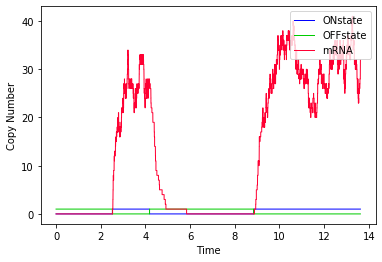

In [4]:
model = stochpy.SSA()
model.Model("Burstmodel.psc")
model.DoStochSim()
model.PlotSpeciesTimeSeries()

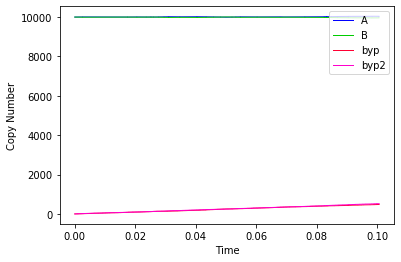

In [5]:
# Créons un petit modèle et sauvons le dans Stochpy/pscmodels/test.psc

model = """
# Reactions
R1:
    A > B + byp
    k1*A

R2:
    B > A + byp2
    k2*B

#InitPar
k1 = 0.5
k2 = 0.5

#InitVar
A = 10000
B = 10000
byp = 0
byp2 = 0
"""

fd=open("Stochpy/pscmodels/test.psc","w")
fd.write(model)
fd.close()

# Question : Dessiner ce modèle et le comprendre. Puis le simuler en utilisant StochPy

model = stochpy.SSA()
model.Model("test.psc")
model.DoStochSim()
model.PlotSpeciesTimeSeries()

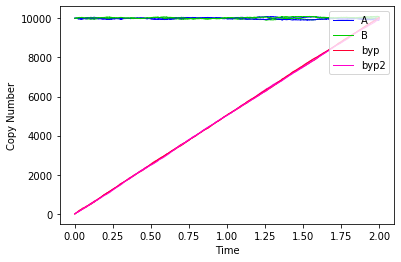

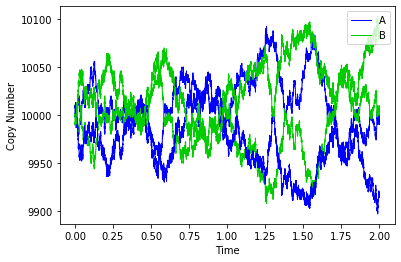

In [11]:
# Avec un autre point de vue et plusieurs trajectoires

model = stochpy.SSA()
model.Model("test.psc")
model.DoStochSim(end=2,mode="time",trajectories=2)
model.PlotSpeciesTimeSeries()

# même graphique en se focalisant sur A et B. 
# Il apparaît clairement que A et B ont des évolutions anticorrélées (i.e. quand une augmente, l'autre diminue)
model.PlotSpeciesTimeSeries(species2plot=["A","B"])


In [ ]:
# Question : Coder un plus grand modèle (eg. celui du cours)

# Modèles booléens

Reprendre l'exemple de PBN donné en cours et le simuler dans les modes synchrone, puis asynchrone

In [12]:
import numpy as np

# PBN en mode synchrone
# rq : etat est un triplet de booléens, la fonction retourne un triplet de booleens
def PBN_syn(etat):
    x1 = etat[0]
    x2 = etat[1]
    x3 = etat[2]
    # calcul des images
    v1_1 = x1 and x2 or not(x2) and not(x3)
    v1_2 = not(x1) and x2 or x3
    v2 = x1 and x3 or not(x1) and x2
    v3 = x1 and not(x2) or not(x3)
    # mise à jour synchrone
    # choix pour x1 en fonction des probabilités
    if np.random.rand()<0.3:
        x1 = v1_1
    else:
        x1 = v1_2
    x2 = v2
    x3 = v3
    return [x1,x2,x3]

# Test de la fonction
PBN_syn([True,False,True])

[False, True, True]

[('000', '101'), ('000', '001'), ('101', '111'), ('101', '011'), ('001', '100'), ('001', '000'), ('100', '101'), ('100', '001'), ('010', '111'), ('010', '011'), ('111', '110'), ('011', '110'), ('011', '010'), ('110', '101'), ('110', '001')]


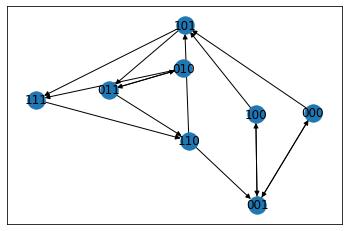

In [15]:
# Question : Construire le graphe de transition (utiliser networkx)

# Voici une solution qui utilise une fonction de codage d'un triplet de booléen en chaîne

def booleen_en_chaine(b):
    if b:
        return "1"
    else:
        return "0"

def codage(triplet):
    return booleen_en_chaine(triplet[0])+booleen_en_chaine(triplet[1])+booleen_en_chaine(triplet[2])

import networkx as nx

G = nx.DiGraph()

# On part de tous les états possibles
for x1 in [False,True]:
    for x2 in [False,True]:
        for x3 in [False,True]:
            # NB : pour capturer le côté probabiliste, il faut calculer plusieurs images
            for i in range(20):
                triplet_depart = [x1,x2,x3]
                triplet_arrivee = PBN_syn(triplet_depart)
                G.add_edge(codage(triplet_depart),codage(triplet_arrivee))

# Affichage du graphe obtenu
# mode text

print(G.edges)

# mode graphique

nx.draw_networkx(G)

In [18]:
# Question : trouver les cycles

for c in nx.algorithms.cycles.simple_cycles(G):
    print(c, ", cycle de taille",len(c))


['000', '001'] , cycle de taille 2
['000', '101', '011', '010', '111', '110', '001'] , cycle de taille 7
['000', '101', '011', '110', '001'] , cycle de taille 5
['000', '101', '111', '110', '001'] , cycle de taille 5
['111', '110', '001', '100', '101', '011', '010'] , cycle de taille 7
['111', '110', '001', '100', '101'] , cycle de taille 5
['111', '110', '101', '011', '010'] , cycle de taille 5
['111', '110', '101'] , cycle de taille 3
['100', '001'] , cycle de taille 2
['100', '101', '011', '110', '001'] , cycle de taille 5
['011', '010'] , cycle de taille 2
['011', '110', '101'] , cycle de taille 3


In [24]:
# Même chose avec un modèle asynchrone

# PBN en mode synchrone
# rq : etat est un triplet de booléens, la fonction retourne un triplet de booleens
def PBN_asyn(etat):
    x1 = etat[0]
    x2 = etat[1]
    x3 = etat[2]
    # calcul des images
    v1_1 = x1 and x2 or not(x2) and not(x3)
    v1_2 = not(x1) and x2 or x3
    v2 = x1 and x3 or not(x1) and x2
    v3 = x1 and not(x2) or not(x3)
    # mise à jour asynchrone
    # on choisit au hasard le gène qui doit changer
    nb = np.random.randint(3)
    if nb == 0:
        # choix pour x1 en fonction des probabilités
        if np.random.rand()<0.3:
            x1 = v1_1
        else:
            x1 = v1_2
    else:
        if nb == 1:
            x2 = v2
        else:
            x3 = v3
    return [x1,x2,x3]

# Test de la fonction
PBN_asyn([True,False,True])


[True, False, True]

[('000', '101'), ('000', '001'), ('101', '111'), ('101', '011'), ('001', '100'), ('001', '000'), ('100', '001'), ('100', '101'), ('010', '111'), ('010', '011'), ('111', '110'), ('011', '110'), ('011', '010'), ('110', '001'), ('110', '101')]


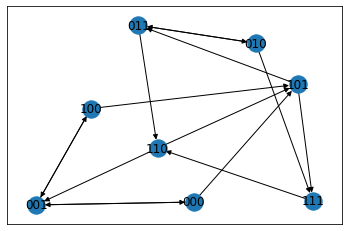

In [33]:
# Question : Construire le graphe de transition (utiliser networkx)

# Voici une solution qui utilise une fonction de codage d'un triplet de booléen en chaîne

def booleen_en_chaine(b):
    if b:
        return "1"
    else:
        return "0"

def codage(triplet):
    return booleen_en_chaine(triplet[0])+booleen_en_chaine(triplet[1])+booleen_en_chaine(triplet[2])

import networkx as nx

G = nx.DiGraph()

# On part de tous les états possibles
for x1 in [False,True]:
    for x2 in [False,True]:
        for x3 in [False,True]:
            # NB : pour capturer le côté probabiliste, il faut calculer plusieurs images
            for i in range(1000):
                # attention, le nombre de choix est beaucoup plus important qu'avant...
                triplet_depart = [x1,x2,x3]
                triplet_arrivee = PBN_syn(triplet_depart)
                G.add_edge(codage(triplet_depart),codage(triplet_arrivee))

# Affichage du graphe obtenu
# mode text

print(G.edges)

# mode graphique

nx.draw_networkx(G)

Question : Etude de l'article https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4567168/

# Réseaux bayésiens

Afin d'étudier les réseaux bayésiens, nous allons nous baser sur une bibliothèque Python puissante, pgmpy

pip install pgmpy

In [ ]:
!pip install pgmpy
!pip install pandas
!pip install wrapt

L'objectif est de créer un modèle bayésien simple issu de (http://www.bnlearn.com/bnrepository/#cancer) en utilisant pgmpy.

Le principe général consiste à définir la structure du réseau, puis de lui ajouter des paramètres probabilistes.

In [ ]:
# Définition de la structure du réseau
from pgmpy.models import BayesianModel

cancer_model = BayesianModel([('Pollution', 'Cancer'), 
                              ('Smoker', 'Cancer'),
                              ('Cancer', 'Xray'),
                              ('Cancer', 'Dyspnoea')])

In [ ]:
# Définition des paramètres
from pgmpy.factors.discrete import TabularCPD

cpd_poll = TabularCPD(variable='Pollution', variable_card=2,
                      values=[[0.9], [0.1]])
cpd_smoke = TabularCPD(variable='Smoker', variable_card=2,
                       values=[[0.3], [0.7]])
cpd_cancer = TabularCPD(variable='Cancer', variable_card=2,
                        values=[[0.03, 0.05, 0.001, 0.02],
                                [0.97, 0.95, 0.999, 0.98]],
                        evidence=['Smoker', 'Pollution'],
                        evidence_card=[2, 2])
cpd_xray = TabularCPD(variable='Xray', variable_card=2,
                      values=[[0.9, 0.2], [0.1, 0.8]],
                      evidence=['Cancer'], evidence_card=[2])
cpd_dysp = TabularCPD(variable='Dyspnoea', variable_card=2,
                      values=[[0.65, 0.3], [0.35, 0.7]],
                      evidence=['Cancer'], evidence_card=[2])

In [ ]:
# Association des parameters à la structure.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Test du model.
cancer_model.check_model()


In [ ]:
# Inference des lois de probabilités (algorithme Variable Elimination)
from pgmpy.inference import VariableElimination
infer = VariableElimination(cancer_model)

# Calcul de la probabilité de faire un test RayonX sachant qu'il y a de la pollution
q = infer.query(variables=['Xray'], evidence={'Pollution': 1})
print(q['Xray'])

Question : reprendre le modèle du cours et calculer les probabilités demandées

In [2]:
!tar czfv ArchiveTP.tgz *

/bin/sh: 1: zip: not found
